In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# File paths and names
xlsx_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name: ")
material2_sheet = input("Enter the second material sheet name: ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Take 50% of each material for each variable
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0

# Extract temperature-related information
temperature_col = "T (K)"
temperature_data = data[material1_sheet][temperature_col]

# Combine material data
merged_data = pd.concat([temperature_data, combined_data], axis=1)

# Extract properties for the specified temperature
temperature_input = float(input("Enter the temperature (in K): "))
closest_index = np.argmin(np.abs(temperature_data - temperature_input))
properties_at_temperature = merged_data.iloc[closest_index]

# Prepare data for training the Random Forest model
X = combined_data.values
y = merged_data.iloc[:, 1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict properties at the specified temperature
properties_at_temperature_values = properties_at_temperature.iloc[1:].values
predicted_properties = model.predict([properties_at_temperature_values])

# Calculate R2 score
y_test_pred = model.predict(X_test)
r2_manual = r2_score(y_test, y_test_pred)

# Display predicted material properties for the combined material at the specified temperature
print("\nPredicted Material Properties for Combined Material at {}K:".format(int(temperature_input)))
for property_name, predicted_value in zip(data[material1_sheet].columns[1:], predicted_properties.flatten()):
    print("{} at {}K - Predicted: {:.6f}".format(property_name, temperature_input, predicted_value))

# Display Manually Calculated R2 Score
print("\nManually Calculated R2 Score: {:.6f}".format(r2_manual))


Enter the first material sheet name: Ti
Enter the second material sheet name: Al
Enter the temperature (in K): 334.15

Predicted Material Properties for Combined Material at 334K:
T (K) at 334.15K - Predicted: 334.510000
Band Gap (eV) at 334.15K - Predicted: 0.000000
Young Module (GPa) at 334.15K - Predicted: 84.788618
Density (g/cm3) at 334.15K - Predicted: 3.528311
Energy Absorption (KJ/m3) at 334.15K - Predicted: 5771.443510
Thermal Conductivity (W/m.K) at 334.15K - Predicted: 85.860632
Specific Heat (J/g.C) at 334.15K - Predicted: 0.731600

Manually Calculated R2 Score: 0.998168


Enter the first material sheet name: Ti
Enter the second material sheet name: Al

Manually Calculated R2 Score: 0.998168


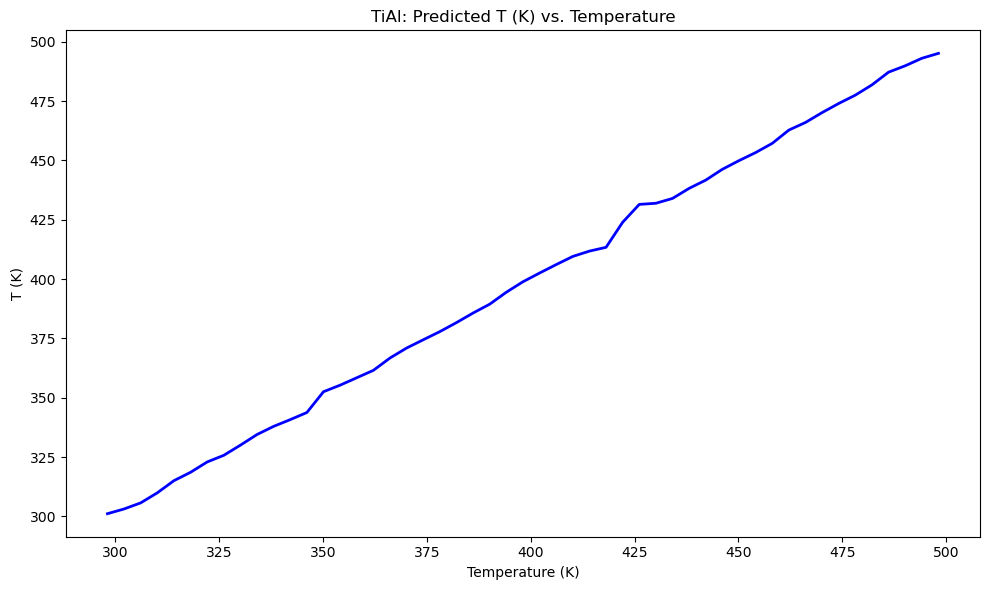

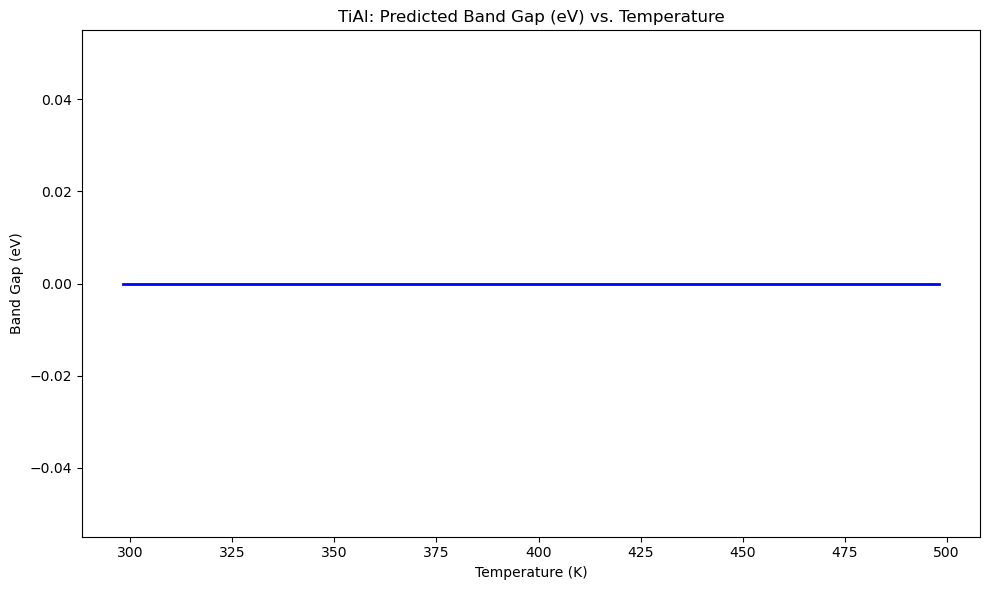

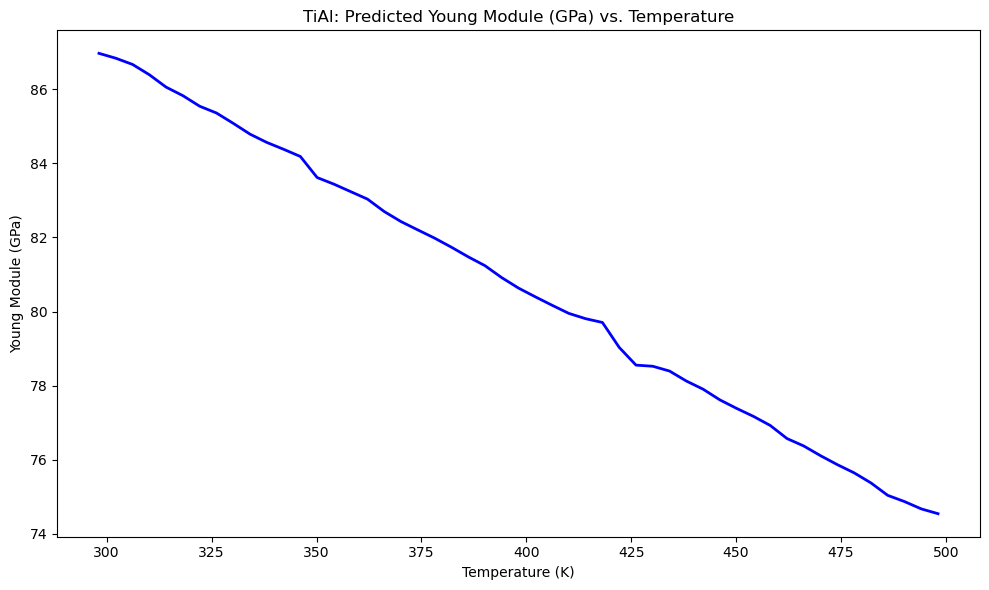

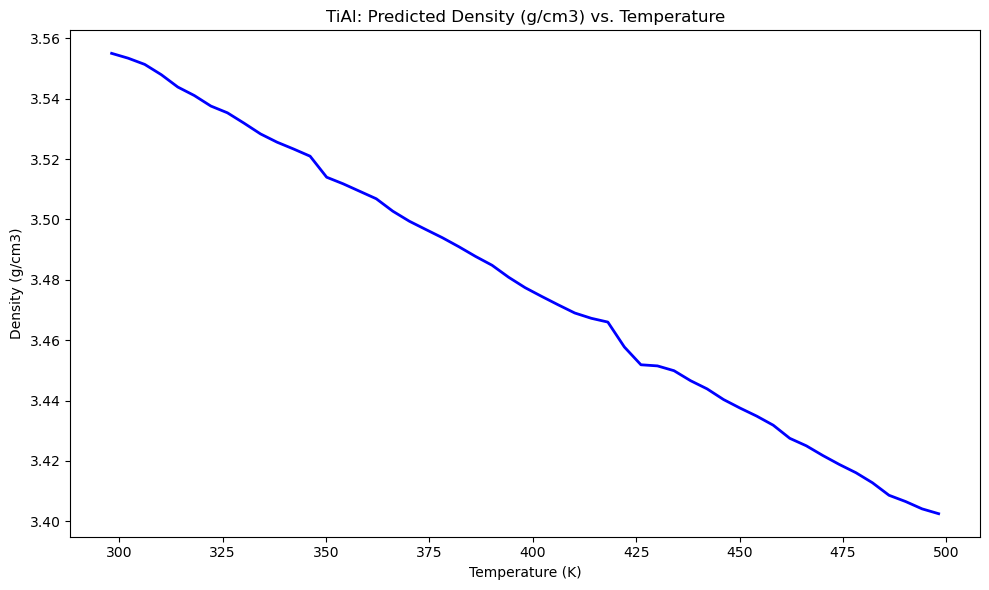

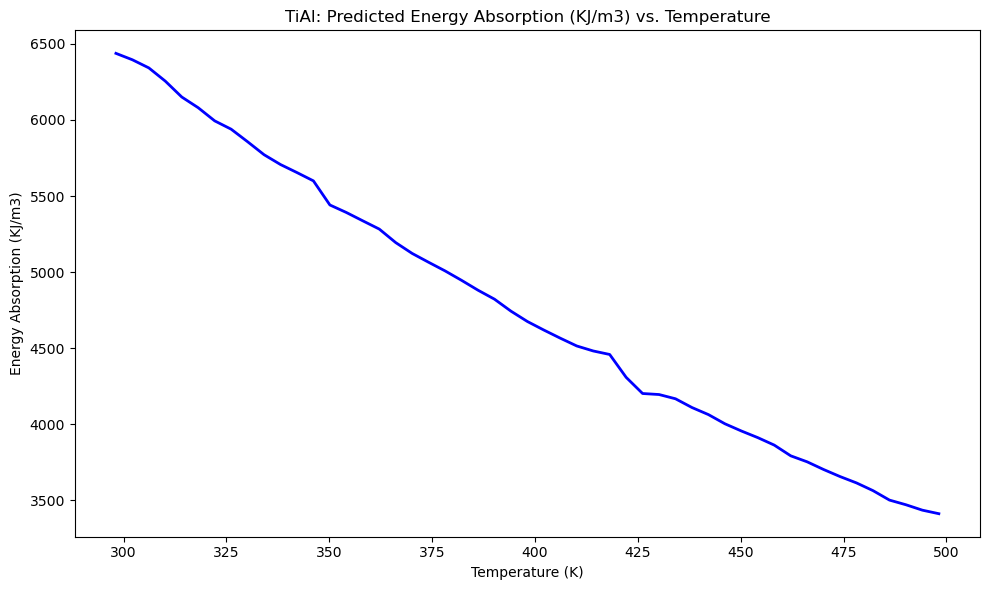

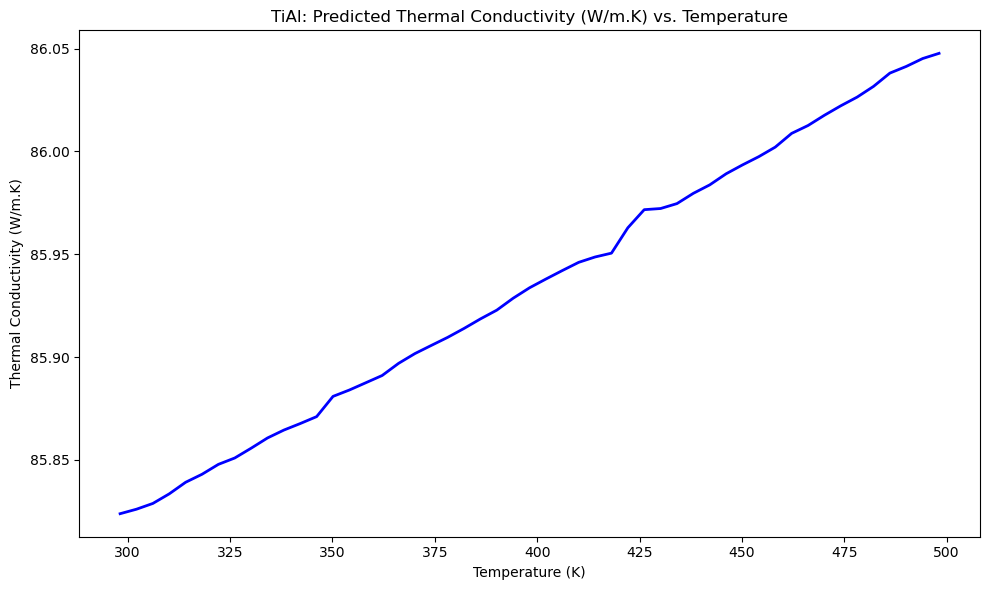

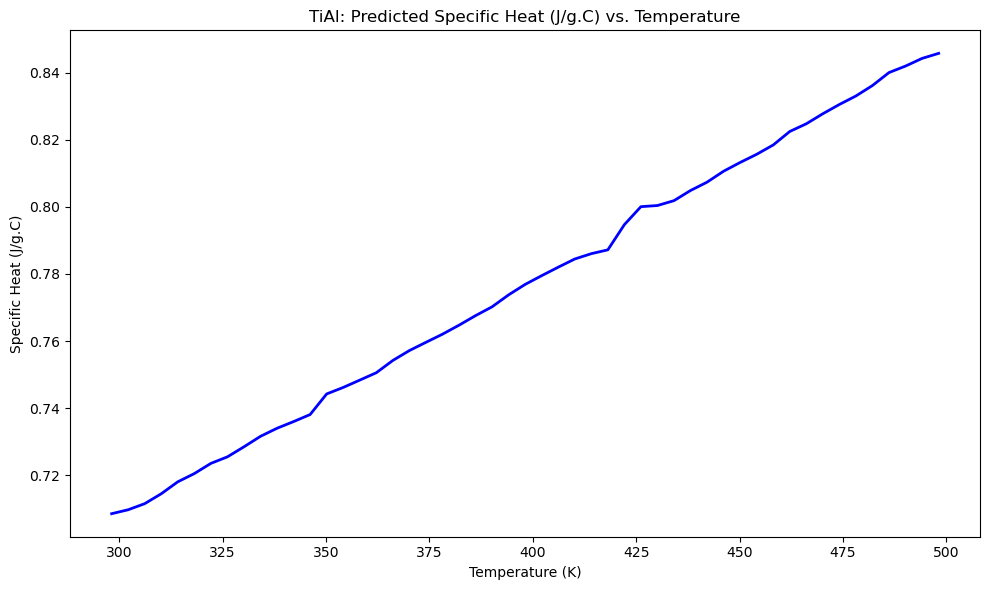

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# File paths and names
xlsx_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name: ")
material2_sheet = input("Enter the second material sheet name: ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Take 50% of each material for each variable
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0

# Extract temperature-related information
temperature_col = "T (K)"
temperature_data = data[material1_sheet][temperature_col]

# Combine material data
merged_data = pd.concat([temperature_data, combined_data], axis=1)

# Prepare data for training the Random Forest model
X = combined_data.values
y = merged_data.iloc[:, 1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict properties across the entire temperature range
predicted_properties = model.predict(X)

# Calculate R2 score
y_test_pred = model.predict(X_test)
r2_manual = r2_score(y_test, y_test_pred)

# Display Manually Calculated R2 Score
print("\nManually Calculated R2 Score: {:.6f}".format(r2_manual))

# Plot each property in separate plots
for i, property_name in enumerate(data[material1_sheet].columns[1:]):
    plt.figure(figsize=(10, 6))
    plt.plot(temperature_data, predicted_properties[:, i], color='blue', linestyle='-', linewidth=2)
    
    plt.xlabel('Temperature (K)')
    plt.ylabel(property_name)
    plt.title(f'TiAl: Predicted {property_name} vs. Temperature')
    plt.gca().set_facecolor('white')
    plt.grid(False)  # Remove grid
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    
    plt.show()


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# File paths and names
xlsx_path = r"D:\Armaghan_PhD_Dissertation\database\Revised data"
xlsx_file = "new data-3 - revised with new data.xlsx"
output_directory = r"D:\Armaghan_PhD_Dissertation\database\Revised data\Outputs"

# Get user inputs for sheet names
material1_sheet = input("Enter the first material sheet name: ")
material2_sheet = input("Enter the second material sheet name: ")

# Load material data
data = {}
for material_sheet in [material1_sheet, material2_sheet]:
    file_path = os.path.join(xlsx_path, xlsx_file)
    material_data = pd.read_excel(file_path, sheet_name=material_sheet)
    data[material_sheet] = material_data

# Take 50% of each material for each variable
combined_data = (data[material1_sheet].iloc[:, 1:] + data[material2_sheet].iloc[:, 1:]) / 2.0

# Extract temperature-related information
temperature_col = "T (K)"
temperature_data = data[material1_sheet][temperature_col]

# Combine material data
merged_data = pd.concat([temperature_data, combined_data], axis=1)

# Prepare data for training the Random Forest model
X = combined_data.values
y = merged_data.iloc[:, 1:].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict properties across the entire temperature range
predicted_properties = model.predict(X)

# Calculate R2 score
y_test_pred = model.predict(X_test)
r2_manual = r2_score(y_test, y_test_pred)

# Display Manually Calculated R2 Score
print("\nManually Calculated R2 Score: {:.6f}".format(r2_manual))

# Specify properties to plot
selected_properties = [
    'Young Module (GPa)', 
    'Density (g/cm3)', 
    'Energy Absorption (KJ/m3)', 
    'Thermal Conductivity (W/m.K)', 
    'Specific Heat (J/g.C)'
]

# Filter the columns to include only selected properties
property_indices = [data[material1_sheet].columns[1:].tolist().index(prop) for prop in selected_properties]
predicted_properties_filtered = predicted_properties[:, property_indices]

# Calculate number of rows for subplots (one column layout)
num_properties = len(selected_properties)
num_cols = 1
num_rows = num_properties

# Increase figure size and set font sizes
plt.figure(figsize=(10, 5 * num_rows), facecolor='white')

# Font size settings
font_size_title = 18
font_size_labels = 16
font_size_ticks = 14

# Generate subplots for each selected property
for i, property_name in enumerate(selected_properties):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.plot(temperature_data, predicted_properties_filtered[:, i], color='blue', lw=2)
    plt.xlabel('Temperature (K)', color='black', fontsize=font_size_labels)
    plt.ylabel(property_name, color='black', fontsize=font_size_labels)
    plt.title(f'{chr(65 + i)}: {property_name}', color='black', fontsize=font_size_title)  # Label plots as A, B, C, etc.
    plt.gca().set_facecolor('white')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_color('black')
    plt.gca().spines['bottom'].set_color('black')
    plt.gca().tick_params(axis='x', colors='black', labelsize=font_size_ticks)
    plt.gca().tick_params(axis='y', colors='black', labelsize=font_size_ticks)

# Adjust layout and save the dashboard
dashboard_file = os.path.join(output_directory, "TiAl_Dashboard.png")
plt.tight_layout()
plt.savefig(dashboard_file)
plt.close()

print(f"Vertical dashboard saved successfully as {dashboard_file}.")

# Save predicted properties to CSV
predicted_output_file = os.path.join(output_directory, "Predicted_Properties.csv")
predicted_properties_df = pd.DataFrame(predicted_properties, columns=data[material1_sheet].columns[1:])
predicted_properties_df.to_csv(predicted_output_file, index=False)

print(f"Predicted properties saved successfully as {predicted_output_file}.")


Enter the first material sheet name: Ti
Enter the second material sheet name: Al

Manually Calculated R2 Score: 0.998168
Vertical dashboard saved successfully as D:\Armaghan_PhD_Dissertation\database\Revised data\Outputs\TiAl_Dashboard.png.
Predicted properties saved successfully as D:\Armaghan_PhD_Dissertation\database\Revised data\Outputs\Predicted_Properties.csv.
